In [1]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image
import torch.nn as nn
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
from torchvision import datasets, transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
chkpnt = torch.load("../project/pytorch-classification-uncertainty-master/results/model_uncertainty_mse_better.pt")

In [3]:
# model = chkpnt['model_state_dict']

In [4]:
class LeNet(nn.Module):
    def __init__(self, dropout=False):
        super().__init__()
        self.use_dropout = dropout
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=5)
        self.fc1 = nn.Linear(20000, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 1))
        x = F.relu(F.max_pool2d(self.conv2(x), 1))
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        if self.use_dropout:
            x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [5]:
softmax = LeNet()

In [6]:
softmax.load_state_dict(chkpnt['model_state_dict'])

<All keys matched successfully>

In [7]:
target_layer = softmax.conv2

In [8]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
#                                                               transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=1, 
                                           shuffle=True)

In [9]:
# torch_img = transforms.Compose([
#     transforms.Resize((28, 28)),
#     transforms.ToTensor()
# ])(img).to(device)

In [158]:
a = iter(train_loader)

In [163]:
img, label = next(a)

In [164]:
print(label)

tensor([4])


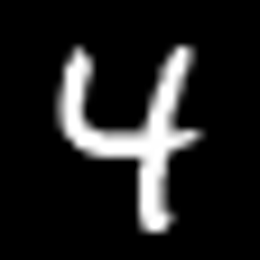

In [165]:
transforms.ToPILImage()(img[0][0]).resize((260,260))

In [56]:
from gradres import *

In [121]:
heatmap, result = get_result(softmax, target_layer, img)

torch.Size([1, 1, 28, 28])


In [145]:
label

tensor([8])

In [76]:
img2 = img

In [167]:
img =transforms.ToPILImage()(img[0][0])

In [168]:
img = img.transpose(PIL.Image.ROTATE_270)

In [169]:
img = torch.Tensor(np.array(img))

In [170]:
img = img.unsqueeze(0)
img = img.unsqueeze(0)

heatmap, result = get_result(softmax, target_layer, img)

torch.Size([1, 1, 28, 28])


C:\Users\ASUS\Anaconda3\envs\FinCausal\lib\site-packages\torch\nn\functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [171]:
img.shape

torch.Size([1, 1, 28, 28])

In [24]:
img1 = transforms.ToPILImage()(transforms.result)

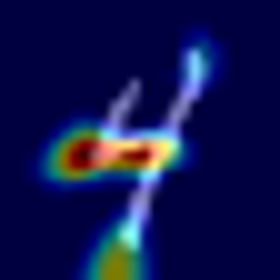

In [25]:
img1.resize((280,280))

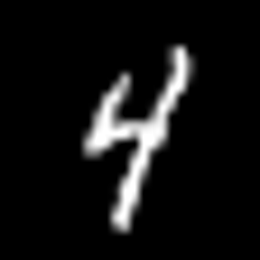

In [26]:
transforms.ToPILImage()(img[0][0]).resize((260,260))

In [49]:
import matplotlib.pyplot as plt

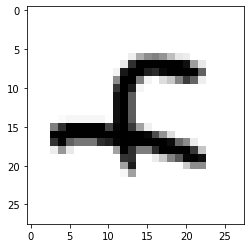

In [172]:
plt.imshow(img.cpu()[0][0], cmap='gray_r')

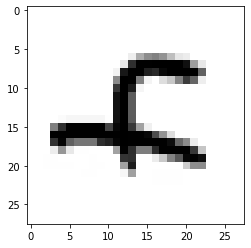

In [173]:
plt.imshow(result.cpu()[0], cmap='gray_r')

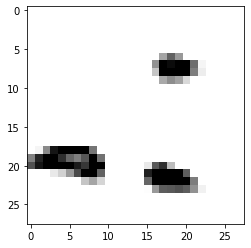

In [174]:
plt.imshow(heatmap.cpu()[0], cmap='gray_r')

In [175]:
F.softmax(softmax(img))

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], grad_fn=<SoftmaxBackward>)

In [177]:
torch.save(img,"Imageyaay.pt")

In [178]:
softmax(img)

tensor([[ -7535.9365, -14182.1465,  -2239.6829,  -6606.8696,  -6473.2852,
            559.1357,  -7627.0874,  -9609.3271,  -5402.1538,  -5830.7803]],
       grad_fn=<AddmmBackward>)